In [1]:
import sys
sys.path.insert(0, '..')

%reload_ext tools.prov_magics
import tools.view.versioned_prov
BASE = "../generated/versioned_prov"

# Versioned-PROV

## Names, literals, and constants

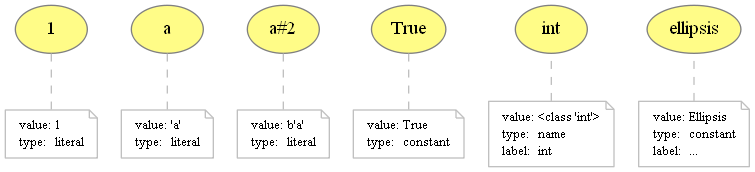

In [2]:
%%provn -o $BASE/names -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>
    
entity(1, [value="1", type="script:literal"])
entity(a, [value="'a'", type="script:literal"])
entity(a#2, [value="b'a'", type="script:literal"])
entity(True, [value="True", type="script:constant"])
entity(int, [value="<class 'int'>", type="script:name", label="int"])
entity(ellipsis, [value="Ellipsis", type="script:constant", label="..."])

## Assignment

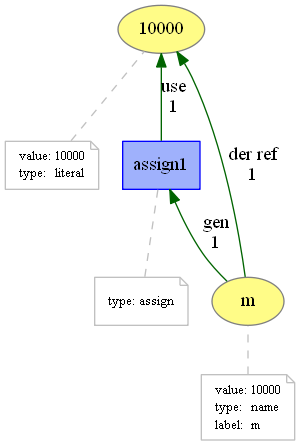

In [3]:
%%provn -o $BASE/assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>
    
entity(10000, [value="10000", type="script:literal"])
entity(m, [value="10000", type="script:name", label="m"])

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="version:Reference", version:checkpoint="1"])

## Operation

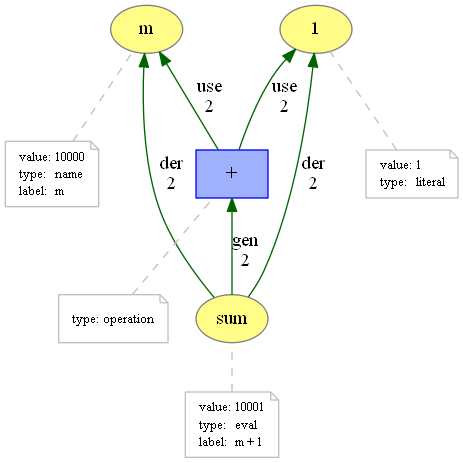

In [4]:
%%provn -o $BASE/operation -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])

// new
entity(1, [value="1", type="script:literal"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2, [version:checkpoint="2"])
wasDerivedFrom(sum, 1, +, g2, u3, [version:checkpoint="2"])

## List definition

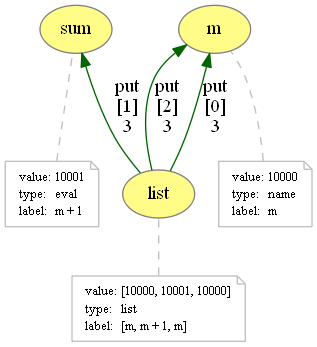

In [5]:
%%provn -o $BASE/list -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

// new
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
hadMember(list, m, [type="version:Put", version:key="0", version:checkpoint="3"])
hadMember(list, sum, [type="version:Put", version:key="1", version:checkpoint="3"])
hadMember(list, m, [type="version:Put", version:key="2", version:checkpoint="3"])

## Assignment of list definition

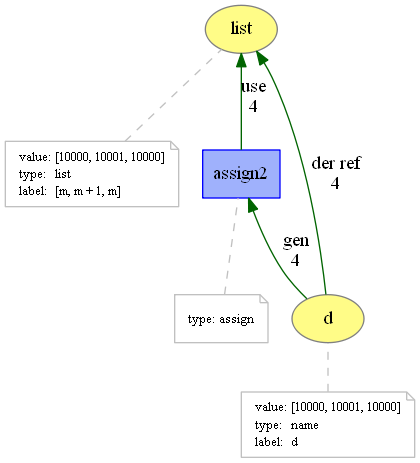

In [6]:
%%provn -o $BASE/list_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])

// new
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4, [type="version:Reference", version:checkpoint="4"])

### Assignment 2

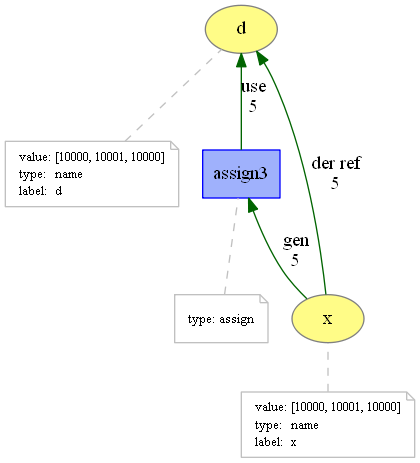

In [7]:
%%provn -o $BASE/list_assign2 -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])

// new
entity(x, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="script:assign"])
wasDerivedFrom(x, d, assign3, g4, u5, [type="version:Reference", version:checkpoint="5"])

## Function call

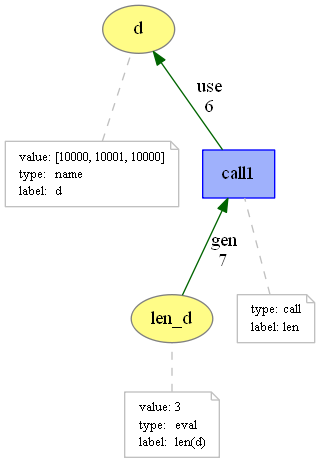

In [8]:
%%provn -o $BASE/call -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>
    
// old
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

// new
entity(len_d, [value="3", type="script:eval", label="len(d)"])

activity(call1, [type="script:call", label="len"])
used(call1, d, -, [version:checkpoint="6"])
wasGeneratedBy(len_d, call1, -, [version:checkpoint="7"])

## Access to part of structure

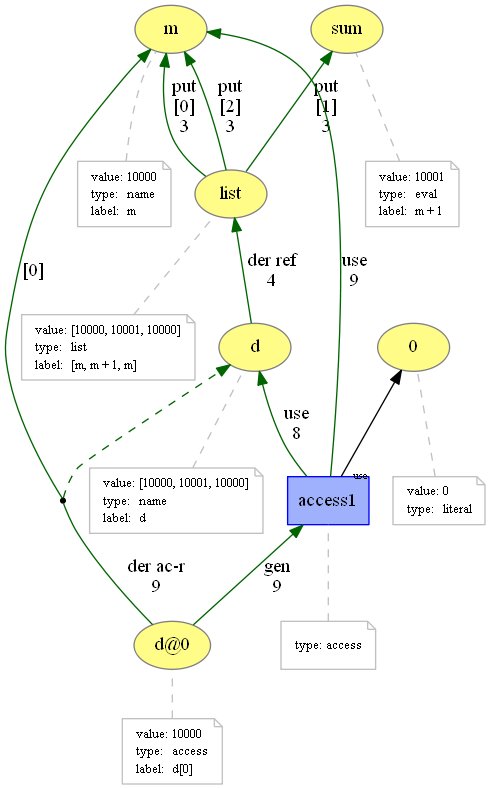

In [9]:
%%provn -o $BASE/access -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
hadMember(list, m, [type="version:Put", version:key="0", version:checkpoint="3"])
hadMember(list, sum, [type="version:Put", version:key="1", version:checkpoint="3"])
hadMember(list, m, [type="version:Put", version:key="2", version:checkpoint="3"])

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])
wasDerivedFrom(d, list, -, -, -, [type="version:Reference", version:checkpoint="4"])


// new
entity(0, [value="0", type="script:literal"])

entity(d@0, [value="10000", type="script:access", label="d[0]"])
activity(access1, [type="script:access"])
used(access1, d, -, [version:checkpoint="8"])
used(access1, 0, -)
wasDerivedFrom(d@0, m, access1, g5, u6, [
    type="version:Reference", version:checkpoint="9", 
    version:collection="d", version:key="0", version:access="r"])

## Assignment to part of structure

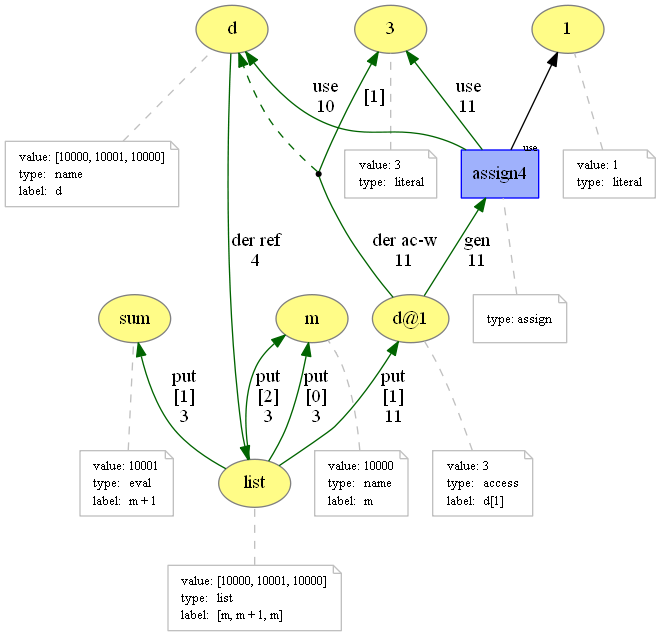

In [10]:
%%provn -o $BASE/part_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
hadMember(list, m, [type="version:Put", version:key="0", version:checkpoint="3"])
hadMember(list, sum, [type="version:Put", version:key="1", version:checkpoint="3"])
hadMember(list, m, [type="version:Put", version:key="2", version:checkpoint="3"])

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])
wasDerivedFrom(d, list, -, -, -, [type="version:Reference", version:checkpoint="4"])
entity(1, [value="1", type="script:literal"])


// new
entity(3, [value="3", type="script:literal"])

entity(d@1, [value="3", type="script:access", label="d[1]"])
hadMember(list, d@1, [type="version:Put", version:key="1", version:checkpoint="11"])

activity(assign4, [type="script:assign"])
used(assign4, d, -, [version:checkpoint="10"])
used(assign4, 1, -)
wasDerivedFrom(d@1, 3, assign4, g6, u7, [
    type="version:Reference", version:checkpoint="11",
    version:collection="d", version:key="1", version:access="w"])

## Full

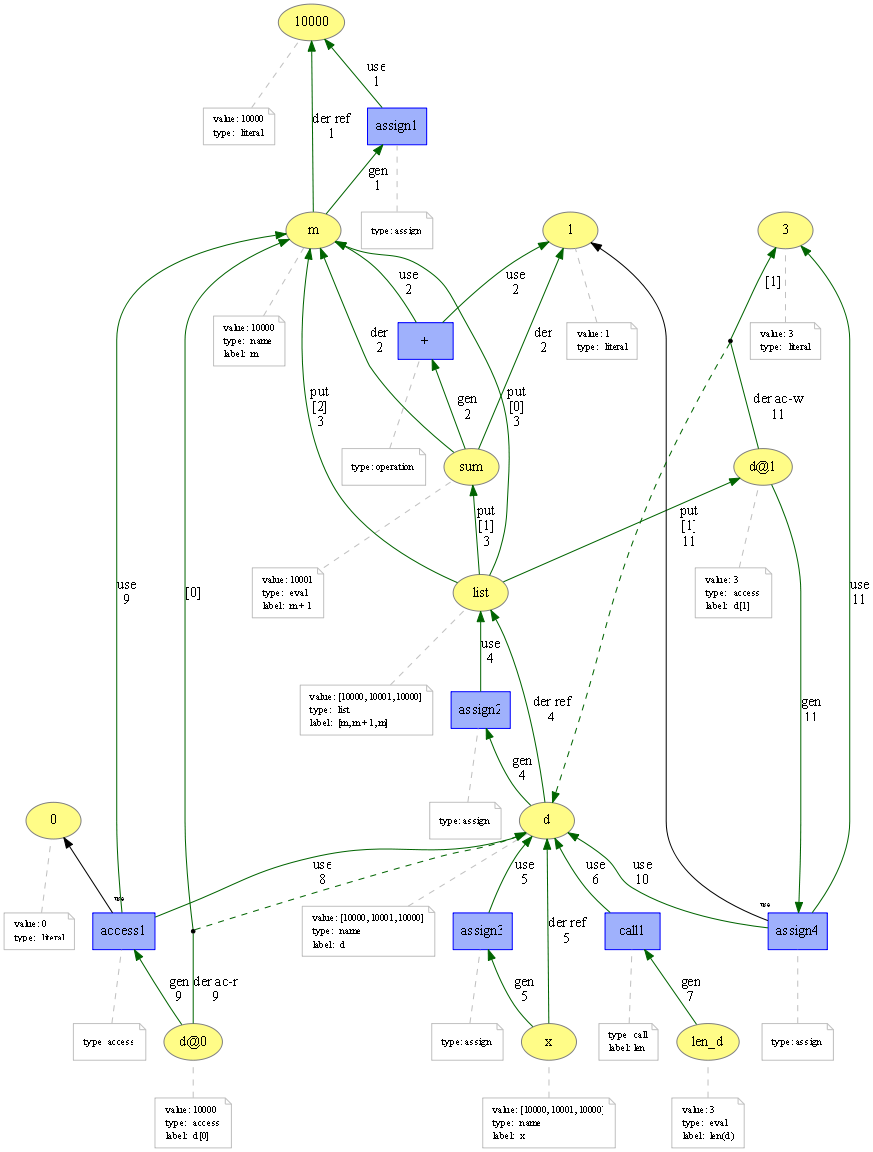

In [11]:
%%provn -o $BASE/full -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// assignment
entity(10000, [value="10000", type="script:literal"])
entity(m, [value="10000", type="script:name", label="m"])

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="version:Reference", version:checkpoint="1"])

// operation
entity(1, [value="1", type="script:literal"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2, [version:checkpoint="2"])
wasDerivedFrom(sum, 1, +, g2, u3, [version:checkpoint="2"])

// list def
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]"])
hadMember(list, m, [type="version:Put", version:key="0", version:checkpoint="3"])
hadMember(list, sum, [type="version:Put", version:key="1", version:checkpoint="3"])
hadMember(list, m, [type="version:Put", version:key="2", version:checkpoint="3"])

// list assign
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4, [type="version:Reference", version:checkpoint="4"])

// list assign x
entity(x, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="script:assign"])
wasDerivedFrom(x, d, assign3, g4, u5, [type="version:Reference", version:checkpoint="5"])

// call
entity(len_d, [value="3", type="script:eval", label="len(d)"])

activity(call1, [type="script:call", label="len"])
used(call1, d, -, [version:checkpoint="6"])
wasGeneratedBy(len_d, call1, -, [version:checkpoint="7"])

// part access
entity(0, [value="0", type="script:literal"])

entity(d@0, [value="10000", type="script:access", label="d[0]"])
activity(access1, [type="script:access"])
used(access1, d, -, [version:checkpoint="8"])
used(access1, 0, -)
wasDerivedFrom(d@0, m, access1, g5, u6, [
    type="version:Reference", version:checkpoint="9", 
    version:collection="d", version:key="0", version:access="r"])

// part assign
entity(3, [value="3", type="script:literal"])

entity(d@1, [value="3", type="script:access", label="d[1]"])
hadMember(list, d@1, [type="version:Put", version:key="1", version:checkpoint="11"])

activity(assign4, [type="script:assign"])
used(assign4, d, -, [version:checkpoint="10"])
used(assign4, 1, -)
wasDerivedFrom(d@1, 3, assign4, g6, u7, [
    type="version:Reference", version:checkpoint="11",
    version:collection="d", version:key="1", version:access="w"])